# GOAL

* load data set from data/exemple1
* crop and make sure the sample is within the field of view for all the images
* export to data/output


# Python imports 

In [1]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import ipywe.fileselector

from ipywidgets import interactive
import ipywidgets as widgets

import time

# Input data folder

In [2]:
data_folder = ipywe.fileselector.FileSelectorPanel(instruction="Select images",
                                                   filters={'TIFF': ['*.tif*']},
                                                   default_filter='TIFF',
                                                   multiple=True)
data_folder.show()

# Load data 

In [3]:
list_files = data_folder.selected
images = []

pb = widgets.IntProgress(min=0, max=len(list_files)-1, description="Loading")
display(pb)

for _index, _file in enumerate(list_files):
    _image = np.array(Image.open(_file))
    images.append(_image)
    pb.value = _index+1
    time.sleep(0.15)    # slowing down the load to be able to see the progress bar in action
    
pb.description = "Done!"

IntProgress(value=0, description='Loading', max=4)

# Visualize data

<IPython.core.display.Javascript object>


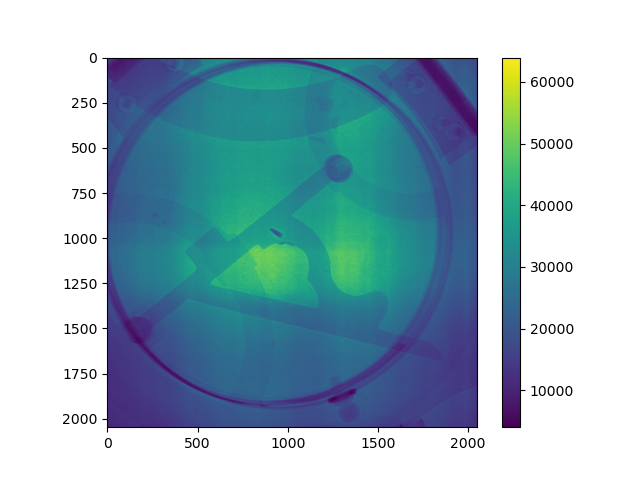

interactive(children=(IntSlider(value=0, description='index', max=4), Output()), _dom_classes=('widget-interac…

In [4]:
%matplotlib notebook
fig, ax = plt.subplots(nrows=1, ncols=1)
ax_image = ax.imshow(images[0])
cb = plt.colorbar(ax_image, ax=ax)
plt.show()

def plot(index):
    global cb
    cb.remove()
    ax_image = ax.imshow(images[index])
    cb = plt.colorbar(ax_image, ax=ax)
    plt.show()
    
v = interactive(plot,
               index = widgets.IntSlider(min=0,
                                        max=len(images)-1))
display(v)

__exercise__: Let's now visualize image index 5, 7, and 10 

# Crop data 

In [5]:
%matplotlib inline
[height, width] = np.shape(images[0])

def plot(index, left, right, top, bottom):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
    ax_image = ax.imshow(images[index])
    ax.axvline(left, color='blue')
    ax.axvline(right, color='blue')
    ax.axhline(top, color='red')
    ax.axhline(bottom, color='red')
    plt.show()
    
    return left, right, top, bottom
    
cropping = interactive(plot,
               index = widgets.IntSlider(min=0, max=len(images)-1),
               left = widgets.IntSlider(min=0, max=width-1, value=0, continuous_update=True),
               right = widgets.IntSlider(min=0, max=width-1, value=width-1, continuous_update=True),
               top = widgets.IntSlider(min=0, max=height-1, value=0, continuous_update=True),
               bottom = widgets.IntSlider(min=0, max=height-1, value=height-1, continuous_update=True))
display(cropping)

interactive(children=(IntSlider(value=0, description='index', max=4), IntSlider(value=0, description='left', m…

In [6]:
[left, right, top, bottom] = cropping.result

In [7]:
images_cropped = []
for _image in images:
    _image_cropped = _image[top: bottom, left: right]
    images_cropped.append(_image_cropped)

# Visualize data cropped 

<IPython.core.display.Javascript object>


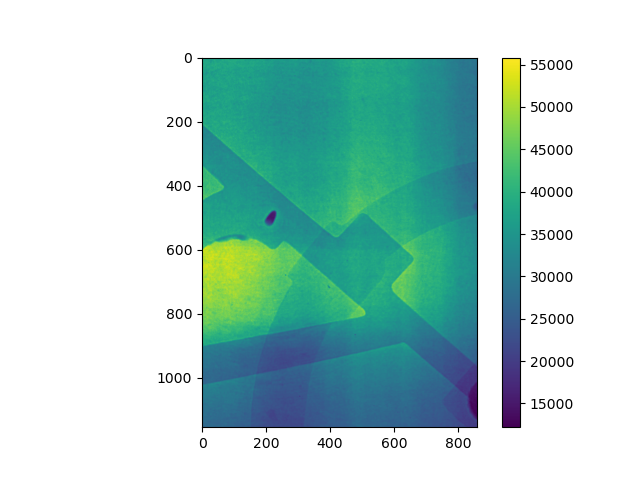

interactive(children=(IntSlider(value=0, description='index', max=4), Output()), _dom_classes=('widget-interac…

In [8]:
%matplotlib notebook

fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax_image = ax1.imshow(images_cropped[0])
cb1 = plt.colorbar(ax_image, ax=ax1)

def plot(index):
    global cb1
    cb1.remove()
    ax_image = ax1.imshow(images_cropped[index])
    cb1 = plt.colorbar(ax_image, ax=ax1)
    plt.show()
    
vv = interactive(plot,
               index = widgets.IntSlider(min=0,
                                        max=len(images)-1))
display(vv)

# Export data 

In [9]:
def export_data(output_folder):

    pb = widgets.IntProgress(min=0, max=len(list_files)-1, description="Exporting")
    display(pb)

    for _index, _image in enumerate(images_cropped):
        file_name = os.path.join(output_folder, f"cropped_image_{_index}.tiff")
        _image_to_export = Image.fromarray(_image)
        _image_to_export.save(file_name)
        time.sleep(0.15)
        pb.value = _index+1

    pb.description = "Done!"
        
output_folder_ui = ipywe.fileselector.FileSelectorPanel(instruction="Select output folder",
                                                        type='directory',
                                                        multiple=False,
                                                        next=export_data)
output_folder_ui.show()

# List widgets 

* [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)
* [Our own widgets we created based on the jupyter widgets](https://github.com/scikit-beam/ipywe/tree/master)